小麦とチェスのサンプルコード（for文）

In [9]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


小麦とチェスのサンプルコード（Numpy）

In [17]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


【問題1】2×2マスのチェス盤の小麦の数

In [24]:
a = np.array(small_board_list)
b = np.reshape(a, (2,2))
print(b)

[[1 2]
 [4 8]]


【問題2】n×mマスへの拡張

In [37]:
n = 3
m = 4

def chess_array(n_line,m_column):
    board_list = [1]
    for _ in range(n_line*m_column - 1):
        board_list.append(2*board_list[-1])
    import numpy as np
    board_ndarray = np.array(board_list)
    a = np.array(board_ndarray)
    b = np.reshape(a, (n_line,m_column))
    return b

print(chess_array(n,m))

[[   1    2    4    8]
 [  16   32   64  128]
 [ 256  512 1024 2048]]


【問題3】小麦の数の合計

[2.55000000e+02 6.52800000e+04 1.67116800e+07 4.27819008e+09
 1.09521666e+12 2.80375465e+14 7.17761191e+16 1.83746865e+19]


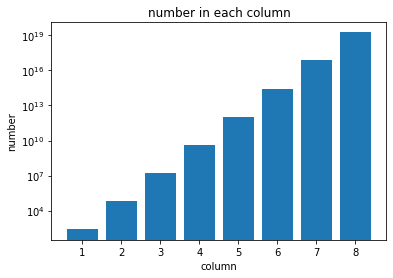

In [82]:
n1 = 8
m1 = 8
#print(chess_array(n1,m1))
amount = np.sum(chess_array(n1,m1), axis=1) # 各列の合計
average = np.average(chess_array(n1,m1), axis = 1) # 各列の平均

print(amount)

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.yscale('log') #対数グラフにする
plt.bar(np.arange(1,9), amount)
plt.show()

【問題4】小麦の数のヒートマップ

[[  1   2]
 [  4   8]
 [ 16  32]
 [ 64 128]]


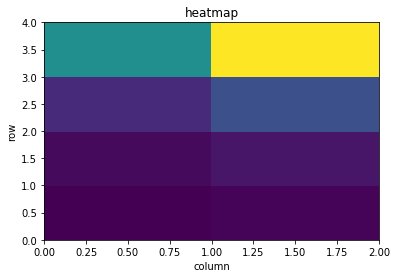

In [86]:
n2 = 4
m2 = 2

print(chess_array(n2,m2))

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chess_array(n2,m2))
plt.show()

【問題5】後半は前半の何倍か

In [97]:
n3 = 2
m3 = 4

print(chess_array(n3,m3))
sum_array = np.sum(chess_array(n3,m3), axis=1) # 列の合計
x = sum_array[1]/sum_array[0]
print("後半は前半の{}倍".format(x))

[[  1   2   4   8]
 [ 16  32  64 128]]
後半は前半の16.0倍


【問題6】他の計算方法によるn×mマスへの拡張

In [103]:
#np.append()を使用した関数
def chess_array_np(n_line,m_column):
    import numpy as np
    board_list = [1]
    for _ in range(n_line*m_column - 1):
        board_list = np.append(board_list, 2*board_list[-1])
    board_ndarray = np.array(board_list)
    a = np.array(board_ndarray)
    b = np.reshape(a, (n_line,m_column))
    return b

print(chess_array_np(4,2))

#ブロードキャストを使用した関数

def chess_array_bc(n_line,m_column):
    import numpy as np
    indices_of_squares = np.arange(n_line*m_column)
    board_list = 2**indices_of_squares
    board_ndarray = np.array(board_list)
    a = np.array(board_ndarray)
    b = np.reshape(a, (n_line,m_column))
    return b

print(chess_array_bc(4,2))

[[  1   2]
 [  4   8]
 [ 16  32]
 [ 64 128]]
[[  1   2]
 [  4   8]
 [ 16  32]
 [ 64 128]]


【問題7】計算時間の比較

for文の場合

In [3]:
%%timeit
n = 3
m = 4
def chess_array(n_line,m_column):
    board_list = [1]
    for _ in range(n_line*m_column - 1):
        board_list.append(2*board_list[-1])
    import numpy as np
    board_ndarray = np.array(board_list)
    a = np.array(board_ndarray)
    b = np.reshape(a, (n_line,m_column))
    return b
chess_array(n,m)

5.89 µs ± 14.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


np.append()文の場合

In [5]:
%%timeit
n = 3
m = 4
def chess_array_np(n_line,m_column):
    import numpy as np
    board_list = [1]
    for _ in range(n_line*m_column - 1):
        board_list = np.append(board_list, 2*board_list[-1])
    board_ndarray = np.array(board_list)
    a = np.array(board_ndarray)
    b = np.reshape(a, (n_line,m_column))
    return b
chess_array_np(n,m)

82 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


ブロードキャスト文

In [6]:
%%timeit
n = 3
m = 4
def chess_array_bc(n_line,m_column):
    import numpy as np
    indices_of_squares = np.arange(n_line*m_column)
    board_list = 2**indices_of_squares
    board_ndarray = np.array(board_list)
    a = np.array(board_ndarray)
    b = np.reshape(a, (n_line,m_column))
    return b
chess_array_bc(4,2)

5.26 µs ± 56.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


考察

In [ ]:
計測結果としてはブロードキャスト、for文、np.append()の順に計算速度が速かった。
np.append()については要素を追加するたびに直前のデータを読み出すため時間がかかっているものと思われる。
次にブロードキャストにおいてはリストの読み出しがなく、与えられら等差数列の各要素を単純計算して求められるため計算時間が短く抑えられたものと推測する。